In [10]:
import pandas as pd
import numpy as np
import joblib
import warnings
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')


In [11]:
df = pd.read_csv("total_urls_dataset.csv")
df['label'] = df['label'].map({'benign': 0, 'malicious': 1})

X = df.drop(columns=['url', 'label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

Training Random Forest...
Saved Random Forest as random_forest_model.joblib
Training Logistic Regression...
Saved Logistic Regression as logistic_regression_model.joblib
Training Support Vector Machine...
Saved Support Vector Machine as support_vector_machine_model.joblib
Training K-Nearest Neighbors...
Saved K-Nearest Neighbors as k-nearest_neighbors_model.joblib
Training XGBoost...
Saved XGBoost as xgboost_model.joblib


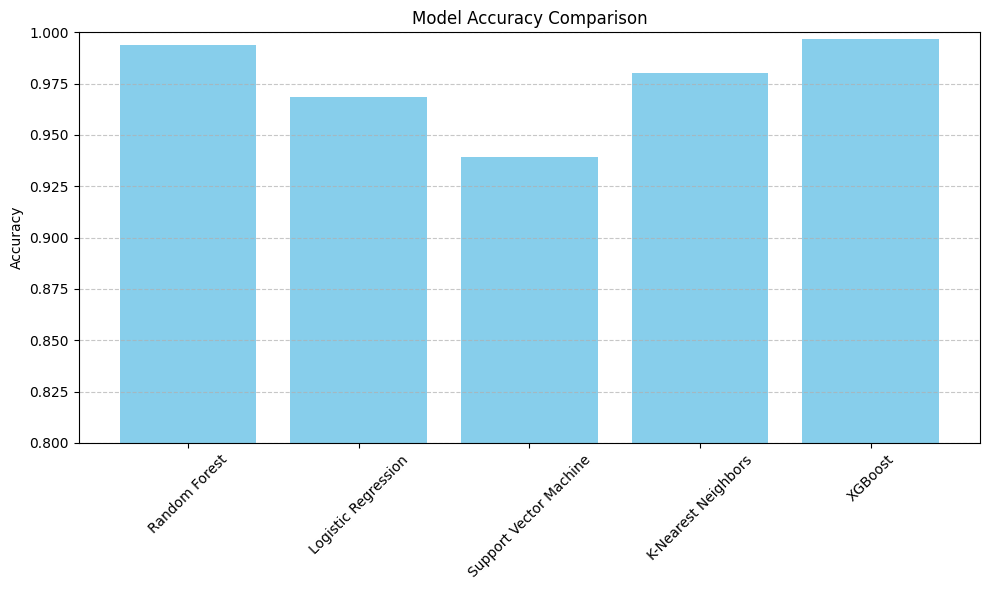

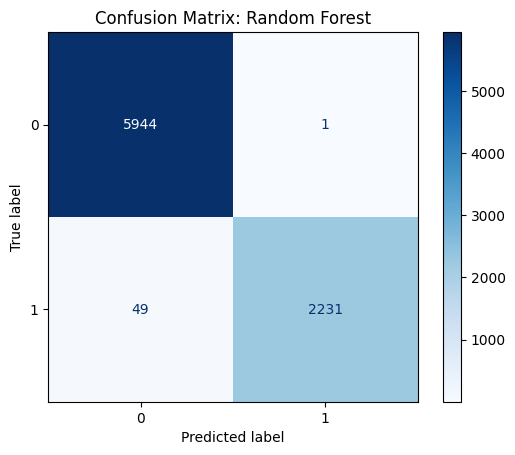

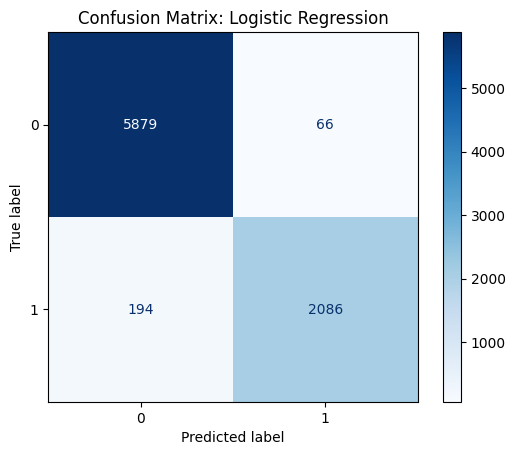

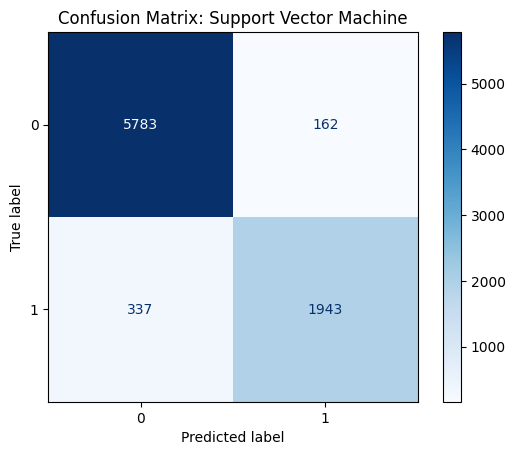

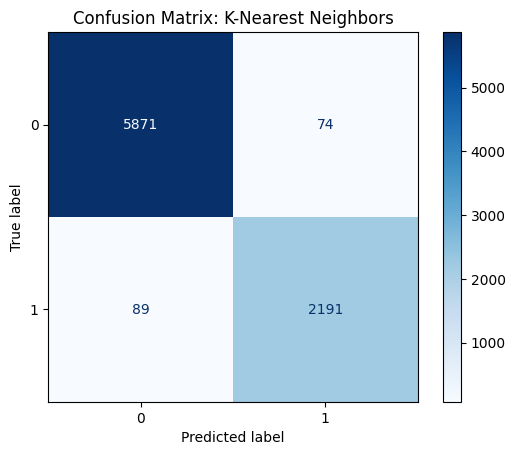

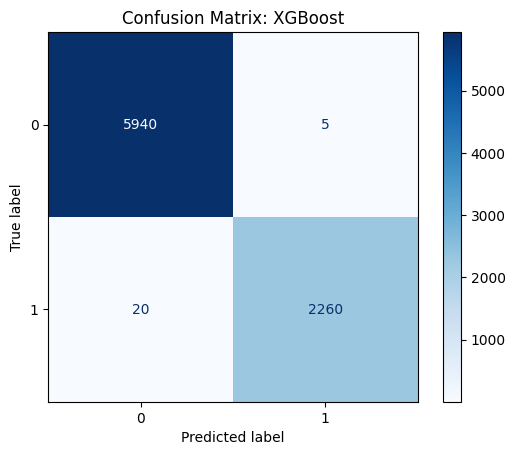

In [25]:
results = {}
conf_matrices = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    filename = name.lower().replace(' ', '_') + '_model.joblib'
    joblib.dump(model, filename)
    print(f"Saved {name} as {filename}")
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = cm

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

for name, cm in conf_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.show()

In [36]:
import urlclassifier

test_urls = [
    "https://www.google.com/c/6807513f-d10c-8009-a944-a6fff5ed3b12",
    "https://www.youtube.com/c/1b26ff98-e5ac-4ac9-81a1-b130f1b9b99b",
    "https://www.facebook.com/c/51b23355-f135-4f8f-82a4-e6bdf9a2cb4c",
    "https://www.wikipedia.org/c/a2d4e21b-d830-4ec5-9e1a-97823d9f9e0f",
    "https://www.reddit.com/c/cb255b75-9b7d-43bb-9a6d-b8e9cb0327e6",
    "https://www.yahoo.com/c/c56cfa42-ef0b-40de-b0d0-e7d8a6494203",
    "https://www.amazon.com/c/d875ca0f-13f1-429d-89e0-240e488f1f64",
    "https://www.github.com/c/03d90868-7bc6-45a4-9ff3-1a19b27b6e97",
    "https://www.linkedin.com/c/c5a703e6-f8a2-48f3-b2d6-fd3ff19ad040",
    "https://www.apple.com/c/a6d3c71f-21a0-4a18-a8f7-b7e5d5e3f29f",
    "https://www.microsoft.com/c/c51e8d95-839f-493a-9370-bb774e20f8b5",
    "https://www.stackoverflow.com/c/fb6ef72e-9b04-4d87-8dbd-3f4ed98c734b",
    "https://www.bbc.com/c/aed27616-0575-4063-bf5f-b5f4bb0c1eaf",
    "https://www.netflix.com/c/a4b2e098-b599-426e-92a0-299f5762639d",
    "https://www.amazon.co.uk/c/aa9a4b07-4d94-4691-b7a9-7a59e4b27039",
    "https://www.ebay.com/c/f5e93df5-9d82-4ab7-8c84-c819c4175a64",
    "https://www.quora.com/c/196e8f09-95bb-4c49-8c5d-7be0e3925bde",
    "https://www.reddit.com/c/57698117-ff02-46ac-91e1-f02237f06b57",
    "https://www.spotify.com/c/5f1ef9a9-4c19-4fc7-8417-cba3c441f658",
    "https://www.twitch.tv/c/f3f7c4a2-81a9-4b75-9ab7-6ed872d53127",
    "https://www.instagram.com/c/d9ed6539-b060-4551-bb01-b4b5e9b5e8b3",
    "https://www.snapchat.com/c/925d1712-8e02-41c7-a85f-7fa5eeb01d92",
    "https://www.pinterest.com/c/87d25b36-0620-4452-8284-b9c0a949a7ed",
    "https://www.bing.com/c/69235c99-0971-4886-82b6-b5fddcb19b0f",
    "https://www.twitter.com/c/1c4b54a3-3f2b-432e-a8ac-951c8f37eddb",
    "https://www.stackexchange.com/c/5a8d7c62-26ac-440f-9e80-cf67c6a9f33b",
    "https://www.digitalocean.com/c/caa2f370-8f42-47cf-9319-602e6e31ed7e",
    "https://www.mailchimp.com/c/8c209d83-dabc-471e-9ec3-bec7b59c1cf1",
    "https://www.cloudflare.com/c/823faed4-6b2c-4d90-99d9-0543785b2890",
    "https://www.youtube.com/c/7c3e3d26-b5b3-455f-b076-156674a1ae75",
    "https://www.google.co.uk/c/d9a9e92d-4358-4871-bb8c-e98c62abbd9a",
    "https://www.mozilla.org/c/6728e11d-cb0f-4706-b033-c9cc43624667",
    "https://www.apple.com/c/8dca0288-b557-430d-a321-b6b8fdab0d50",
    "https://www.spotify.com/c/abb9aab7-d2db-44a1-a585-dc16a95f307d",
    "https://www.wix.com/c/ae78b6e9-0d66-4d71-8fe1-549987d372d7",
    "https://www.ycombinator.com/c/6293c4db-9a7f-4973-94f5-2cf34c980f5a",
    "https://www.washingtonpost.com/c/7f4c299d-3db9-4446-a51c-58051b5822da",
    "https://www.bbc.com/c/d4b32ac4-e6ed-4d70-90a1-9c43c0c2e3ab",
    "https://www.cnn.com/c/13ab9280-3549-4293-9be0-e1d2ad5a6e61",
    "https://www.tumblr.com/c/98cd7f5f-b24a-4a58-b37a-b372bb77f410",
    "https://www.spotify.com/c/6d530f50-d69b-4d01-8ab1-431fa3805ed2",
    "https://www.twitch.tv/c/22d01f5b-f256-4a79-b823-bc3a75207da7",
    "https://www.amazon.in/c/d0a69cb9-bfa2-4700-bdc4-501ad255f013",
    "https://www.stackoverflow.com/c/56694f2d-d3c0-4a7a-b243-11de47ea314e",
    "https://www.giantbomb.com/c/3ef973d9-e903-4a51-a908-c7db58d45f89",
    "https://www.codeacademy.com/c/fcd76892-9378-43f4-9440-d6a49b9c46c9",
    "https://www.w3schools.com/c/a5a4f299-373f-4216-b272-c55a7fca2066",
    "https://www.imdb.com/c/f0d249f5-79e6-41ad-94db-b6ec17cce104",
    "https://www.nytimes.com/c/0c6e6b25-bf5d-42e3-a0c1-69a3f60bfb9e",
    "https://www.flickr.com/c/d1c5ed7d-dab9-4a37-bae9-b9a960eddef1",
    "https://www.slack.com/c/156809a0-1bdb-4620-9b97-c981d171aba2",
    "https://www.dropbox.com/c/cb10d906-c97c-4f8f-89e0-b51b82c8d27e",
    "https://www.linkedin.com/c/1b84aeb6-63fe-462f-b445-b2d97d1d5683",
    "https://www.bing.com/c/6600a1f2-9059-4846-9b50-9a12a5d01c8d",
    "https://www.nike.com/c/1a76d5f7-5d0c-4dbf-9b55-0fd51ad4c8ca",
    "https://www.pinterest.com/c/772cf013-c93a-4d78-835f-453b39e9ed56",
    "https://www.airbnb.com/c/a01d2055-6c44-4a90-b2ca-bf3d4a3e57b3",
    "https://www.groupon.com/c/0e4560da-3b8b-4c6b-b0e1-f58c53de3a98",
    "https://www.cnn.com/c/9d34abac-d5ae-4a3e-b0d4-473ad357290b",
    "https://www.yelp.com/c/6c927541",
    'https://www.youtube.com/watch?v=HoS7mffQ2YQ', 
    'https://orteil.dashnet.org/cookieclicker/', 
    'https://www.google.com/search?q=test+search&sca_esv=c540a9187ac95f1b&source=hp&ei=utkIaLTlH4yVvr0P-MqCmAY&iflsig=ACkRmUkAAAAAaAjnykOnEn6IUh61M6C_RV68-xSpkbNS&ved=0ahUKEwi0qpnikO6MAxWMiq8BHXilAGMQ4dUDCA0&uact=5&oq=test+search&gs_lp=Egdnd3Mtd2l6Igt0ZXN0IHNlYXJjaDIHEAAYgAQYEzIHEAAYgAQYEzIHEAAYgAQYEzIHEAAYgAQYEzIHEAAYgAQYEzIIEAAYExgWGB4yCBAAGBMYFhgeMggQABgTGBYYHjIKEAAYExgWGAoYHjIIEAAYExgWGB5IlRNQAFjlEXAAeACQAQCYAYYBoAHyBqoBBDEwLjG4AQPIAQD4AQGYAgugAooHwgILEAAYgAQYsQMYgwHCAgQQABgDwgIFEAAYgATCAg0QABiABBixAxiDARgKwgIHEAAYgAQYCpgDAJIHBDEwLjGgB_04sgcEMTAuMbgHigc&sclient=gws-wiz&sei=wNkIaNmRLcLBjuMPmvST0QY', 'https://www.amazon.com/ASUS-Display-NVIDIA%C2%AE-i7-13650HX-G614JV-AS74/dp/B0CRDCXRK2/ref=sr_1_1?_encoding=UTF8&content-id=amzn1.sym.860dbf94-9f09-4ada-8615-32eb5ada253a&dib=eyJ2IjoiMSJ9.kdk_DANmsKfk1R3vHdaiglkIRirNCajaP1TXbr8-OSTbgNegRk4RgaY09wKOmvuQrkZJ8x03VXgu18VpfFwQaI3XbgCYavuk3mUhfJAuQEnlh1xo1tiWrTLmyVd3QHBTozSHt7tzt8ulWGqYZexPTD7hBjEpOxik0O2l7QhfIajGzx6M3kq0TEJJaTEMh5rzlp6z_fsriAr8wxEY6bYgfeKXVZZe3HGGQ1rNBcy3X8YN_hoNueY56QQZnjhri-UiPJfhtvYpMoEqv-F5HfFkP5h0l0GiFtgpa0UNODgPBo0.4PYWSzbcWAu4bymumwPMnV_2YOewHSO2ymjqheIia7M&dib_tag=se&keywords=gaming&pd_rd_r=1d34ad80-1aa5-410e-95a6-80921add3e0a&pd_rd_w=a1dDH&pd_rd_wg=IRajX&qid=1745410517&sr=8-1', 
    'https://www.aliexpress.com/ssr/300000444/GSDWp3p6aC?spm=a2g0o.home.superdeal.1.1bff76dbMu62A8&disableNav=YES&pha_manifest=ssr&_immersiveMode=true&productIds=1005007327931650',
    'https://en.wikipedia.org/wiki/English_Wikipedia', 'https://www.bing.com/search?q=search+a+bing&form=QBLH&sp=-1&ghc=1&lq=0&pq=search+a+bi&sc=11-11&qs=n&sk=&cvid=B81AA258E0B346668EE9ACC065620340', 'https://www.aupp.edu.kh/faculty/kuntha-pin/', 'https://kh.linkedin.com/in/pin-kuntha-ab389a194', 'https://www.bbc.com/news/live/cyvq5vpd70lt', 'https://www.npr.org/2025/04/23/nx-s1-5333682/atavists-lydia-millet-book-review', 'https://stackoverflow.com/questions/79588609/what-are-the-key-drivers-behind-the-global-cocoa-market-growth', 'https://www.google.com/search?q=latest+news&qdz=Q48MX&alw=XEHLE30758&jh=ABUUNOWFAF', 'https://www.bing.com/search?q=cat+videos&uwnb=VCGJ0&la=CU0DV&du=9803LNXZ0KYA3P&zq=Y0UOAG1E9YXMJH&bbpqi=61X5A6G', 'https://www.amazon.com/s?q=latest+news&kjrd=4Y1KBA3PJT3L1M&et=SCXOFN&zg=6JM9A9&di=ON2TBW3AP', 'https://www.bing.com/search?q=latest+news&wiy=D72805F4Z8Z&bd=T635KS7ZX7&odvwx=2TZTPSPN2N', 'https://www.ecosia.org/search?q=coding+tutorial&nkq=IHH21TZ6RPQ1&eqa=3MI6JK2Q&gz=T4OQ1IVDBE0P8&wmjw=3IUXC3B0V6N', 'https://duckduckgo.com/?q=cat+videos&qa=OK3U3Y8GSWXA&yf=S9XUARR9BT5&nw=WZWW2ZQ88DV&sje=DDT0MIF79B5Z&mb=3DV0Z', 'https://www.amazon.com/s?q=weather+today&ecp=W0XVML9457G9&wpves=REXYFX&fblb=CA3E3KV7TDMQG&ktzu=RE3GVMEGQM0IMQQ&wc=6F0Z1ALV4KOSRS&uql=BPNJEDP7KWF', 'https://www.ebay.com/sch/i.html?q=buy+laptop&wnwj=5Y05IL6&que=FAQ0J2&az=9SRIT5&df=AN5I6RTA&owg=851UMS&gmb=UKW98AWZVIPGDKK', 'https://www.ecosia.org/search?q=buy+laptop&azcbn=QYVFQOYRTSFCA&uatpy=LN9WI43ZF&ntsef=8XUWIFW0UR8I&wc=OE7OD1EEQJULUKY&aj=302CYFKJCNK9IUB&kuj=64L3V4FV9GK', 'https://www.youtube.com/results?q=weather+today&kp=4KFFQG9FV&tmq=MLO5H9DBN3&xovtr=YK84PH8T9SHJT9', 'https://www.facebook.com/search/top/?q=weather+today&kfou=KR4Y09YZQ7A&qb=BDFQZ02H5Y6ANMN&ctit=2NV4FQ27L', 'https://search.yahoo.com/search?q=coding+tutorial&cei=UT6F0ZP6DORTTGO&iafqs=GFCXUT56H9278&emm=6LPHQ&kabnr=H4NEN2Q&wk=8AWCEY956Y&xzc=S56QBIXSE9KJ', 'https://search.yahoo.com/search?q=weather+today&bzmbi=W99FGFP34MU&ejb=UWMT8C&kokm=JA601E7', 'https://search.yahoo.com/search?q=cat+videos&bfw=194863CKI&wz=53W4HXJ05BDU&lx=31NVT', 'https://www.youtube.com/results?q=cat+videos&afrg=CGZXY32NTZCV4&pyr=QMOJWKOFEJ&mxdcy=MUVS6E524&zyupr=B44YIUNQXDYS', 'https://www.google.com/search?q=latest+news&dj=KCAZJXUPHX&rdr=QN6H6DA&pwt=5HMXLM2BLFZHTY4', 'https://www.ecosia.org/search?q=cat+videos&ycow=TJPBDFMKM&mj=2YFRO08M5&ku=9WXOZVKCRSOE1D', 'https://www.ecosia.org/search?q=coding+tutorial&xk=3DS8MGQ5F4&gqziv=79WBCTIM&pxkl=UD6BU&cginm=I682P8545NT&bb=CC1EO&fv=KU8Y9K', 'https://www.youtube.com/results?q=cat+videos&tdi=6KX79FBYHX&ve=OF9PI9&hk=0A7X6CTSWJU5&auaov=YTNM3TZ', 'https://twitter.com/search?q=cat+videos&xzvsf=M50IT2LK2WJ&fq=7KS2EG23JTYATB7&dquje=8PIXHFVB5P&hwj=EBGA9E99V6&cwkw=8GQUPTK3H1C6FI4&fqi=KO1EUERJW7R', 'https://twitter.com/search?q=weather+today&wm=5CQFHUETQH&prp=EAK0P8QP8BWCTEK&rl=W7RP6OD1RYNAIH6&udn=Q3OTEAAUY&uu=O0RFAARZ&imq=523YKCL0LU', 'https://www.ecosia.org/search?q=coding+tutorial&croxu=1Q8MO&vvi=2EDW8I6ZSAL&qmbl=PCUE15W&xxlsj=RH0NI&qtedn=1KWCOW7YCT&ud=TZXTTFT3', 'https://www.bing.com/search?q=weather+today&gus=K6BNG3JLA8D&yjzy=SVCIU9XNIC7IX&efu=8AD3BL&ggy=3WNBEM9C&qzq=KV39KB2HM8JKUV', 'https://search.yahoo.com/search?q=buy+laptop&gzyp=WMXWOTB35H5&lfi=7O3M6&ns=P466O', 'https://www.youtube.com/results?q=cat+videos&allzp=4DJIWOL18&ude=3E3HXIPE3GF8ZX&mhlo=ZM69L&fxz=3NWY2TA2C9K&dkqk=BOQ63LCVF19', 'https://www.ecosia.org/search?q=cat+videos&juksw=WWMOU1MIDWO&iqp=LQHUU112Q&cy=28F9C263JTZZOGH', 'https://www.google.com/search?q=buy+laptop&fv=H5QVIUV8HBIGY6&jdt=ZWNGKQJZUZ2I5&xqc=XXHP2AFRFP7&fq=9PVV9S6F&ym=O2C15OY17M5&qur=X1EV7WV5IO0Q', 'https://www.bing.com/search?q=weather+today&nliv=S25ESCUYH&etjdb=PKHL957VB6&afq=2M4UUX&vrsuu=DWAXI5NK', 'https://search.yahoo.com/search?q=cat+videos&danql=IBPDGRJTDZC6R9&hsjz=S4HAR9YX&he=5O9M9B0W8T3P&dfio=AKIUGIDRP&sfew=1WPCS5SMI3&xcsf=Y8YO769BRB', 
    'https://search.yahoo.com/search?q=cat+videos&lq=6N89TSHQDNF&lx=UPCXEXI8UJMR&dqwc=TXNNX5B&lo=OYLBBP6L&ugr=LGAJP2Z5P0J&bg=T9EVZ8A',
    'https://www.ecosia.org/search?q=weather+today&gxnv=LRJG1&pnb=7OW2KF8NKZ&xvmbq=OGN5UA51YZD&gbfxk=3MR6V1L07&wax=VV6L4D7NPTZRJ&qwsr=YZ223BCO0K', 
    'https://duckduckgo.com/?q=latest+news&psxsl=KJX8SS26TLJG1D&tdlbd=EYQ49U0FB0&yhksa=1FELHRXLEY7M4I3&rdh=2SS2JP0JK&zrznt=AS0MD&rpv=RN8FO7V2Z', 
    'https://duckduckgo.com/?q=weather+today&ydvy=O5MQT8FAGWLD&fdh=92SBGW&bptlu=Y2TY6E45AMTJ&eae=FJ6WUHKVC0A&xnn=02T7Z2NNXTZW', 
    'https://www.bing.com/search?q=buy+laptop&jv=3OLLONCJV5I&btdf=B8YKPQQ48PBSCPT&eig=LTLEN22E8DH', 
    'https://search.yahoo.com/search?q=cat+videos&hbvha=J9RXKBI9&eh=2OTK3L267R0C2&ak=NKAGGE2100JQ8KF&zset=VXI4AEZ80UF5P6Q&kqg=UIJ7MRR106&ld=55NO86Y65K', 
    'https://www.ecosia.org/search?q=buy+laptop&bgy=MFEIORGNCYA3O&gq=RTU2B7TPPE3LK7&coeg=DESIVYMPSIA7', 
    'https://www.ecosia.org/search?q=cat+videos&ghi=9HPPP71&yl=YAIA4IV2DERM&opeg=CN15X1ZW1J4', 
    'https://www.ecosia.org/search?q=cat+videos&sxwwc=Q56C7&kc=47QO867MANJWN&sxors=000FU&azq=INNZJYOHDHJ', 
    'https://www.youtube.com/results?q=buy+laptop&suwqu=5MZ31IP&gr=9776DZVC8N&agxsj=92NZ6Z1AU&pay=6JGSUX&uxli=5FQTULAKWB87Q3', 
    'https://duckduckgo.com/?q=coding+tutorial&zat=H95F3&wgwpq=VET87YYYXL3UD12&wtppk=5UXV010&fmruo=511D1YIEZ8SB&ubmw=R6O6HDXW', 
    'https://duckduckgo.com/?q=latest+news&lvvep=XJJAG6PGHH5&zrbh=6IFK6JK&miscd=8HU8XXUV7JV&qgfez=UJ1LRBSI0J', 
    'https://www.bing.com/search?q=buy+laptop&ri=PT6W0M84QLCE7Q&wwz=RUF38KCIA&zft=8Q1VGDV&xdd=WL13W03EJ&yf=3HS4E&apskw=6CF1GY0N9CW', 
    'https://www.amazon.com/s?q=buy+laptop&zhr=D0EF1&sz=DROFJUUJ1XKX&go=JIE1ZBVIHHZEXV4&hiyw=X58GFIAJ1FIGZJH&wfqyf=S1DYMET8CN38E', 'https://www.ebay.com/sch/i.html?q=coding+tutorial&rdmu=SA66A&dryc=45BPU4MOTGP56V&erdg=K387M14DA0D4W&sqpg=3SC22HD2B3&jty=RCU50SBOZJGYO&joxrk=YY8JK', 'https://twitter.com/search?q=coding+tutorial&zaugw=X3QLOZ3&nz=UNXCUIIEI8&mphip=GPM03RGT1R6XZT8', 'https://www.bing.com/search?q=cat+videos&qabr=WGMU2V0E&cipc=SGNZPTWS48&bvtpa=GOESY&vmnj=NQT12JP6SW5A9G0&fd=4M65I101IJ&cxwv=M3GG8KSAL4', 'https://twitter.com/search?q=buy+laptop&povss=KJ3U8IX35CLOU&ugzha=O4X8US5K&bjai=M5A8055X77VDO59&rlyy=68R3RJ', 'https://duckduckgo.com/?q=buy+laptop&xhfbe=ASFN4HTB19WYXM&vp=T68HW&huuog=BFNR86IJ9UNFJ8&ejj=E364K&qru=JPEAMRZQKPND1&vcwx=W4WXVZGVLUROQ0', 'https://www.ecosia.org/search?q=cat+videos&pct=BJAAU5V4V&tbyf=0CMK5MZLS&aiwj=ZEBLBTB63UCNC&si=GDNCLVOAXT&fqfv=FREFJ88NN&zqeyr=M2JX2K47', 'https://www.bing.com/search?q=cat+videos&ujejf=GEW2K&sr=02QAKKEU4&dckla=59VB1XM8BZD347P&xko=1BKH2R3I', 'https://www.facebook.com/search/top/?q=cat+videos&fr=F1GT0DU&wvok=GQJL7XMH&cgv=M0PDRU3', 'https://www.google.com/search?q=coding+tutorial&bw=1QCWAA96FQYH&fbxh=YW2TV&vu=L3PVH&qdfp=G5KSQZOJ306H&un=TSE5YFF', 'https://www.amazon.com/s?q=buy+laptop&dznn=I8712DSKW&zmg=8XA5RW1&qd=7PRTN4GH69YN830', 'https://www.ecosia.org/search?q=buy+laptop&lzt=L1ZCA7&ewaxq=I99M2JWOD9XT9&qcl=9HVSEGWRAIR', 'https://www.youtube.com/results?q=coding+tutorial&jal=GARY4PD06X&zsixi=8ZAAXHB6BT&daohx=3L0SIY52VQHTVH8&ojx=XHFSI9S3GU', 'https://www.youtube.com/results?q=weather+today&pifr=QC8YN90FM4FLSOJ&zcp=3DV1XIM9WZMFJMU&hqhx=6OM322ASDN1PB', 'https://search.yahoo.com/search?q=weather+today&oi=CZE9R4PJGMR&uukxl=ZXFVG&rjb=L3OJW9PF&yah=D35IP52QIB&fkg=651FWM1X&qgi=04U67BZ7EN', 'https://www.facebook.com/search/top/?q=coding+tutorial&cjdiy=24RNFCKVX0BW&ynqf=3CDC5D89&vmtr=JR978W&xp=YEEZ4NMJ8R6FHH', 'https://www.amazon.com/s?q=latest+news&jwzbz=UDBJ1NTC&yjzol=QYWNP3YV51D&xfaw=BUDGOMRZOVRE&vroa=O4YRI3F5BCNKA&wjfss=NIU2IA39DHKQJ&cozei=1PYU1VE1', 'https://www.bing.com/search?q=coding+tutorial&lsq=OV5FU2F&cru=ZN1EB67289SGW4&mtpuq=3CE0485&ykx=QHLFQVXLXM&yxfed=K44L2Z88W2RY891&whbj=3DR1EGRWHB8', 'https://duckduckgo.com/?q=weather+today&epws=X3ATDKHA8MDB5CZ&kyu=G1OXBJNK9PP8&ajal=DXYUUT8R&foyf=P1X6DR8RBCMY&ctq=WP5YFTHD&vgype=UULWDY23Z4M4KNT', 'https://www.bing.com/search?q=latest+news&tdc=936O2OJ&qg=G3HOYVPW87Z&pmmb=JSL4QNI&pfbdw=OD7P5JI2I&nqeu=G5Z1QNTWAO', 'https://www.youtube.com/results?q=weather+today&aygxn=LUS2IMW5WOD&gaf=0FNIJTF&it=RX4J1&kbqze=R5IGU7', 'https://www.ecosia.org/search?q=weather+today&lrc=3ZTMI43&tglkm=ZUPJFYDVXY9RQ&ofeeu=36MARWRTAA', 'https://www.youtube.com/results?q=latest+news&piat=H4VG4JB&axelc=8E9QEGM7&yva=RRK82KQS98HML&knb=4BZRVFDIJBDT&zmcdh=511YOP3TPT6L9G&rhrcy=FFCA2T', 'https://www.ebay.com/sch/i.html?q=latest+news&mvz=MFQXBV0V&wb=WAUNJ9I05&hdstm=YKV1ILP9GPN8HUC&mq=NRT1B7X5NX', 'https://www.ebay.com/sch/i.html?q=cat+videos&qs=SXF2PTJ20B9GK&liqn=BS8Z07R&lwnb=VQZVQ&oumzf=H3VW7KKHSU5ZU&ucnq=6J5A4D&hn=F38XE24S', 'https://search.yahoo.com/search?q=buy+laptop&jxkj=NPKLVYI7IE0I&gnvi=LT7RAF&doja=P4J559OSAMG8MF&fn=V3YCM3WH7IPSWQ3', 'https://search.yahoo.com/search?q=coding+tutorial&odif=28IZZPY9U&lbl=7AN0WENXB&yhrgq=9MZXH48Z', 'https://www.amazon.com/s?q=weather+today&ni=EHV4STR7OHLXVK&nxdg=ORO5TJZGSRO&hquv=Z316BQTXTYP&ilst=2ABI348&zakr=J3SX4K&bkbk=P8XWQ24P', 'https://search.yahoo.com/search?q=coding+tutorial&hxalj=JY0RGR6W&yve=6Q4L2XS727QX&snr=BTHIE9D9', 'https://www.google.com/search?q=coding+tutorial&orqjf=ADGG9Z2&pbjp=1KF5UA9&gtpe=XN2SX56&vrc=WQTN4&uj=SUR18AUEO2OX6Z8', 'https://www.google.com/search?q=weather+today&jxms=4MB2WBIF5&ysji=LZ1V48J&wkj=4IB4V7&abpb=RD9MVWWG9&blltg=K1MCVTA7H0&jfs=BABG9PN', 'https://www.amazon.com/s?q=weather+today&pizs=MSDOR&ndc=GIP9VAIH7&qmjnh=W04R5NW&cxr=6JS5UZCLD', 'https://duckduckgo.com/?q=weather+today&rvs=7GOKWG3XPZP&ga=0GECHXJY00MGI&jjqbh=R87KGA3PYDX2Y3J&sz=XTL10G&rad=XN4QD', 'https://www.ecosia.org/search?q=weather+today&em=7MXDCZRL&rthq=Y06HEP&etw=EDKIYQ0Q&ofj=E3E6GUF6WBM3&npvo=SRLRZ2IQQN8LI&apb=IAAE788DMGD', 'https://www.bing.com/search?q=weather+today&zz=2OSFRH0&dvmd=V8F4CELTE&bp=8NIBVDVGD6X8&maet=U66MUGXRF', 'https://www.facebook.com/search/top/?q=cat+videos&wd=XF4QUYPV&bnmh=5EP1UZA1GM46&baldq=9YI0GRJU8TM2N87&eyzw=6AY8WD0JJVSZQ9G&gtuuj=GIHYTK9WO3PEJ&dq=JXQ6E05GYH6L2K', 'https://search.yahoo.com/search?q=latest+news&xcej=KY0ZGLI9Z6C7&rekqw=N1GQ2E9&vt=S8JOT5&bn=6CCGLVLQWEAY7&crhdo=FES4CY1P5LQ7IU&njsn=4F4J8TXZ2X', 'https://www.facebook.com/search/top/?q=cat+videos&vuii=J42KHB&is=TX9V37&lbms=Q0MGDEQH9JXRGP7&ae=BWF8BJ4UG5DZVRC&rpu=DETVYI82QAHCB', 'https://twitter.com/search?q=weather+today&hqajn=TMQ9J&tdp=0WB4ATIR9103FXP&dz=CLJ2BLD1XWFGJ57&se=9V2A2O6BFYW&wfuu=EX7CPFW5&imbr=W0HDA5NHD7NNL', 'https://search.yahoo.com/search?q=cat+videos&qryfz=UPODEN&hwwxo=KL4D80USDW9&irgg=6UWGS4ZI5', 'https://www.youtube.com/results?q=cat+videos&yo=Q8H7E9&dojsl=SZANR21EO&blshc=KKKFCZ&ts=6LQRQPM&vs=DFV3LUX9LNMTL19&xtb=PEJCL', 'https://www.facebook.com/search/top/?q=coding+tutorial&rrjxk=NBBYX4AY&uz=9PG5YITK1K&essn=POR6G&qo=VKQ5A7A1WRXY8HC', 'https://duckduckgo.com/?q=coding+tutorial&ctveo=SBKV7FI1LCR&dyiy=TQY4KZ9OYAVA5O3&ez=PUE6S5TSCJN&dy=KZ6UBNLY4Y5GG2S', 'https://duckduckgo.com/?q=coding+tutorial&nhex=IB1W6WSYPKR7&rupj=BDKDZ80NYABBKHO&tidfm=KSI2C8&oqmt=2H6A024VN4', 'https://www.ebay.com/sch/i.html?q=cat+videos&xx=CS048O&ozarh=U5TJASR15&wsla=WW7CDS&xqvur=7JACQYA&oieg=W2BAF4753BM81R', 'https://www.amazon.com/s?q=latest+news&nbte=H73TFVH1M9649&usn=0366LPU7AK47YG&lanx=CF5WTD&rwv=7SY8TGZFU&ioh=1BK26EVM', 'https://www.bing.com/search?q=latest+news&ufi=WDQ172&xo=3B99H&pftam=8X9ZHNT3G9&necy=08AVTK', 'https://www.bing.com/search?q=weather+today&fz=4YT60PI1&mb=GGTLH9PB04DL5U7&dvhf=LZNGBMWK3', 'https://www.facebook.com/search/top/?q=latest+news&sk=HOVZXH5&lhp=6MEG15C14V&px=C1L9DWUZJBWM', 'https://www.ebay.com/sch/i.html?q=cat+videos&ax=AVTF6WTVPN&tngu=G6N6GA30&lokem=RNBB5C6D1&oxpqh=J7Z54FAPY&cdjd=04KKIAG&nn=3AP22F8HIXQK', 'https://twitter.com/search?q=latest+news&lgbfv=DCU7KFVBV&mekq=BNLPDPUY74Q&dk=JI9HT&gmcqo=8XX2RMXH9T7NDC9&rbcka=G3L6QL5DGE8&nttbi=BRKVUF', 'https://www.bing.com/search?q=weather+today&uhf=5IBODA&qcn=T6BGC4LKY8I10TF&aj=WPEWWSES7VDMKV4&hp=5K7LKNSDS8ZRHZ7&sar=4RI3TZR', 'https://www.google.com/search?q=weather+today&lk=067L96QRY&ysmfa=Q857N&godp=JTHIWR1LUS&thwpv=V16G3&ueqw=ROM3UU1LIMQ1&oemw=LUS91LJCNFY', 'https://www.ecosia.org/search?q=buy+laptop&jzl=ZLJN0SF5UPDT&wys=0HYE477W&iopm=36LKKU2EHP&kmlpy=AZKXDMCEG50GMJ&nsvfj=M9IX4&kxzl=UCY676HVV5TV', 'https://www.google.com/search?q=weather+today&fb=4SZ3SEZ1O31YU1&oq=5BTVB5CEZUH&vbpvq=46ZMJ7ZTKUKL1E', 'https://www.ebay.com/sch/i.html?q=latest+news&js=M358GZHA&hicev=ESCJPCQD0C988B&oqoic=TZKW91U340IWY', 'https://www.google.com/search?q=latest+news&lcnj=GLDZ9CWC&tbgsy=CML9AHQHT3V&vhous=DYP55GMQ&kuhqe=K6462ZJZ', 
    'https://www.ecosia.org/search?q=buy+laptop&nicg=VNM4P8JW73&fzqbe=XXJFU0VPEW&cavc=EHB9N9ZA'
    

]




test_features = []
for u in tqdm(test_urls, desc="Extracting features"):
    test_features.append(urlclassifier.build_url(u))

test_X = pd.DataFrame(test_features, columns=X.columns)
y_true  = np.zeros(len(test_urls), dtype=int)  # all benign=0



Extracting features: 100%|██████████| 172/172 [00:00<00:00, 1522.13it/s]


In [37]:
results = {}
for name, m in models.items():
    preds = m.predict(test_X)
    acc   = accuracy_score(y_true, preds)
    results[name] = acc
    print(f"{name:<25} Accuracy: {acc*100:5.2f}%")


Random Forest             Accuracy: 90.12%
Logistic Regression       Accuracy: 91.28%
Support Vector Machine    Accuracy: 88.95%
K-Nearest Neighbors       Accuracy: 92.44%
XGBoost                   Accuracy: 81.40%


In [13]:
from urlclassifier import build_url

df = pd.read_csv("total_urls_dataset.csv")
feature_columns = df.drop(columns=['url','label']).columns.tolist()

models = {
    "Random Forest": joblib.load("random_forest_model.joblib"),
    "Logistic Regression": joblib.load("logistic_regression_model.joblib"),
    "Support Vector Machine": joblib.load("support_vector_machine_model.joblib"),
    "K-Nearest Neighbors": joblib.load("k-nearest_neighbors_model.joblib"),
    "XGBoost": joblib.load("xgboost_model.joblib")
}

url = input("Enter URL to test: ").strip()

features = build_url(url)
X = pd.DataFrame([features], columns=feature_columns)

print(f"\nResults for: {url}\n" + "-"*40)
for name, model in models.items():
    pred = model.predict(X)[0]
    label = "Malicious" if pred == 1 else "Benign"

    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)[0][pred]
        print(f"{name:<25} → {label:<9} (conf: {proba:.2%})")
    else:
        print(f"{name:<25} → {label}")



Results for: https://urlhaus.abuse.ch/browse/
----------------------------------------
Random Forest             → Benign    (conf: 96.00%)
Logistic Regression       → Benign    (conf: 99.62%)
Support Vector Machine    → Benign    (conf: 87.01%)
K-Nearest Neighbors       → Benign    (conf: 80.00%)
XGBoost                   → Benign    (conf: 99.60%)


In [14]:
df = pd.read_csv("total_urls_dataset.csv")
feature_columns = df.drop(columns=['url','label']).columns.tolist()


models = {
    "Random Forest": joblib.load("random_forest_model.joblib"),
    "Logistic Regression": joblib.load("logistic_regression_model.joblib"),
    "Support Vector Machine": joblib.load("support_vector_machine_model.joblib"),
    "K-Nearest Neighbors": joblib.load("k-nearest_neighbors_model.joblib"),
    "XGBoost": joblib.load("xgboost_model.joblib")
}

def testurl(url):
    features = build_url(url)  
    X = pd.DataFrame([features], columns=feature_columns)

    resulte = []
    for name, model in models.items():
        pred = model.predict(X)[0]
        resulte.append(pred)
    return(resulte)




In [ ]:
df = pd.read_csv("urldata.csv")

samples = df.sample(n=10000, random_state=42)

model_order = ['Random Forest','Logistic Regression',"SVM", "K-NN",'XGboost']
model_results = [0,0,0,0,0]
sample_urls = samples['url'].tolist()
sample_labels = samples['result'].tolist()

counter = 0
for x in range(len(sample_urls)):
    print(x)
    for y,z in enumerate(testurl(sample_urls[x])):
        if z == sample_labels[x]:
            print(model_order[y], "YES")
            model_results[y] +=1
        else:
            print(model_order[y],"NO")

print(model_results)

0
Random Forest YES
Logistic Regression YES
SVM NO
K-NN NO
XGboost NO
1
Random Forest YES
Logistic Regression YES
SVM NO
K-NN YES
XGboost YES
2
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
3
Random Forest YES
Logistic Regression YES
SVM YES
K-NN NO
XGboost YES
4
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
5
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
6
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
7
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
8
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
9
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
10
Random Forest YES
Logistic Regression YES
SVM YES
K-NN NO
XGboost YES
11
Random Forest YES
Logistic Regression NO
SVM YES
K-NN NO
XGboost YES
12
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
13
Random Forest YES
Logistic Regression YES
SVM NO
K-NN

In [19]:
for y,x in enumerate(model_results):

    print(model_order[y], 100*(x/10000))

Random Forest 90.09
Logistic Regression 86.16
SVM 77.49000000000001
K-NN 80.12
XGboost 87.4


In [31]:
allsafe = ['https://www.youtube.com/watch?v=HoS7mffQ2YQ', 'https://orteil.dashnet.org/cookieclicker/', 'https://www.google.com/search?q=test+search&sca_esv=c540a9187ac95f1b&source=hp&ei=utkIaLTlH4yVvr0P-MqCmAY&iflsig=ACkRmUkAAAAAaAjnykOnEn6IUh61M6C_RV68-xSpkbNS&ved=0ahUKEwi0qpnikO6MAxWMiq8BHXilAGMQ4dUDCA0&uact=5&oq=test+search&gs_lp=Egdnd3Mtd2l6Igt0ZXN0IHNlYXJjaDIHEAAYgAQYEzIHEAAYgAQYEzIHEAAYgAQYEzIHEAAYgAQYEzIHEAAYgAQYEzIIEAAYExgWGB4yCBAAGBMYFhgeMggQABgTGBYYHjIKEAAYExgWGAoYHjIIEAAYExgWGB5IlRNQAFjlEXAAeACQAQCYAYYBoAHyBqoBBDEwLjG4AQPIAQD4AQGYAgugAooHwgILEAAYgAQYsQMYgwHCAgQQABgDwgIFEAAYgATCAg0QABiABBixAxiDARgKwgIHEAAYgAQYCpgDAJIHBDEwLjGgB_04sgcEMTAuMbgHigc&sclient=gws-wiz&sei=wNkIaNmRLcLBjuMPmvST0QY', 'https://www.amazon.com/ASUS-Display-NVIDIA%C2%AE-i7-13650HX-G614JV-AS74/dp/B0CRDCXRK2/ref=sr_1_1?_encoding=UTF8&content-id=amzn1.sym.860dbf94-9f09-4ada-8615-32eb5ada253a&dib=eyJ2IjoiMSJ9.kdk_DANmsKfk1R3vHdaiglkIRirNCajaP1TXbr8-OSTbgNegRk4RgaY09wKOmvuQrkZJ8x03VXgu18VpfFwQaI3XbgCYavuk3mUhfJAuQEnlh1xo1tiWrTLmyVd3QHBTozSHt7tzt8ulWGqYZexPTD7hBjEpOxik0O2l7QhfIajGzx6M3kq0TEJJaTEMh5rzlp6z_fsriAr8wxEY6bYgfeKXVZZe3HGGQ1rNBcy3X8YN_hoNueY56QQZnjhri-UiPJfhtvYpMoEqv-F5HfFkP5h0l0GiFtgpa0UNODgPBo0.4PYWSzbcWAu4bymumwPMnV_2YOewHSO2ymjqheIia7M&dib_tag=se&keywords=gaming&pd_rd_r=1d34ad80-1aa5-410e-95a6-80921add3e0a&pd_rd_w=a1dDH&pd_rd_wg=IRajX&qid=1745410517&sr=8-1', 
'https://www.aliexpress.com/ssr/300000444/GSDWp3p6aC?spm=a2g0o.home.superdeal.1.1bff76dbMu62A8&disableNav=YES&pha_manifest=ssr&_immersiveMode=true&productIds=1005007327931650', 'https://en.wikipedia.org/wiki/English_Wikipedia', 'https://www.bing.com/search?q=search+a+bing&form=QBLH&sp=-1&ghc=1&lq=0&pq=search+a+bi&sc=11-11&qs=n&sk=&cvid=B81AA258E0B346668EE9ACC065620340', 'https://www.aupp.edu.kh/faculty/kuntha-pin/', 'https://kh.linkedin.com/in/pin-kuntha-ab389a194', 'https://www.bbc.com/news/live/cyvq5vpd70lt', 'https://www.npr.org/2025/04/23/nx-s1-5333682/atavists-lydia-millet-book-review', 'https://stackoverflow.com/questions/79588609/what-are-the-key-drivers-behind-the-global-cocoa-market-growth', 'https://www.google.com/search?q=latest+news&qdz=Q48MX&alw=XEHLE30758&jh=ABUUNOWFAF', 'https://www.bing.com/search?q=cat+videos&uwnb=VCGJ0&la=CU0DV&du=9803LNXZ0KYA3P&zq=Y0UOAG1E9YXMJH&bbpqi=61X5A6G', 'https://www.amazon.com/s?q=latest+news&kjrd=4Y1KBA3PJT3L1M&et=SCXOFN&zg=6JM9A9&di=ON2TBW3AP', 'https://www.bing.com/search?q=latest+news&wiy=D72805F4Z8Z&bd=T635KS7ZX7&odvwx=2TZTPSPN2N', 'https://www.ecosia.org/search?q=coding+tutorial&nkq=IHH21TZ6RPQ1&eqa=3MI6JK2Q&gz=T4OQ1IVDBE0P8&wmjw=3IUXC3B0V6N', 'https://duckduckgo.com/?q=cat+videos&qa=OK3U3Y8GSWXA&yf=S9XUARR9BT5&nw=WZWW2ZQ88DV&sje=DDT0MIF79B5Z&mb=3DV0Z', 'https://www.amazon.com/s?q=weather+today&ecp=W0XVML9457G9&wpves=REXYFX&fblb=CA3E3KV7TDMQG&ktzu=RE3GVMEGQM0IMQQ&wc=6F0Z1ALV4KOSRS&uql=BPNJEDP7KWF', 'https://www.ebay.com/sch/i.html?q=buy+laptop&wnwj=5Y05IL6&que=FAQ0J2&az=9SRIT5&df=AN5I6RTA&owg=851UMS&gmb=UKW98AWZVIPGDKK', 'https://www.ecosia.org/search?q=buy+laptop&azcbn=QYVFQOYRTSFCA&uatpy=LN9WI43ZF&ntsef=8XUWIFW0UR8I&wc=OE7OD1EEQJULUKY&aj=302CYFKJCNK9IUB&kuj=64L3V4FV9GK', 'https://www.youtube.com/results?q=weather+today&kp=4KFFQG9FV&tmq=MLO5H9DBN3&xovtr=YK84PH8T9SHJT9', 'https://www.facebook.com/search/top/?q=weather+today&kfou=KR4Y09YZQ7A&qb=BDFQZ02H5Y6ANMN&ctit=2NV4FQ27L', 'https://search.yahoo.com/search?q=coding+tutorial&cei=UT6F0ZP6DORTTGO&iafqs=GFCXUT56H9278&emm=6LPHQ&kabnr=H4NEN2Q&wk=8AWCEY956Y&xzc=S56QBIXSE9KJ', 'https://search.yahoo.com/search?q=weather+today&bzmbi=W99FGFP34MU&ejb=UWMT8C&kokm=JA601E7', 'https://search.yahoo.com/search?q=cat+videos&bfw=194863CKI&wz=53W4HXJ05BDU&lx=31NVT', 'https://www.youtube.com/results?q=cat+videos&afrg=CGZXY32NTZCV4&pyr=QMOJWKOFEJ&mxdcy=MUVS6E524&zyupr=B44YIUNQXDYS', 'https://www.google.com/search?q=latest+news&dj=KCAZJXUPHX&rdr=QN6H6DA&pwt=5HMXLM2BLFZHTY4', 'https://www.ecosia.org/search?q=cat+videos&ycow=TJPBDFMKM&mj=2YFRO08M5&ku=9WXOZVKCRSOE1D', 'https://www.ecosia.org/search?q=coding+tutorial&xk=3DS8MGQ5F4&gqziv=79WBCTIM&pxkl=UD6BU&cginm=I682P8545NT&bb=CC1EO&fv=KU8Y9K', 'https://www.youtube.com/results?q=cat+videos&tdi=6KX79FBYHX&ve=OF9PI9&hk=0A7X6CTSWJU5&auaov=YTNM3TZ', 'https://twitter.com/search?q=cat+videos&xzvsf=M50IT2LK2WJ&fq=7KS2EG23JTYATB7&dquje=8PIXHFVB5P&hwj=EBGA9E99V6&cwkw=8GQUPTK3H1C6FI4&fqi=KO1EUERJW7R', 'https://twitter.com/search?q=weather+today&wm=5CQFHUETQH&prp=EAK0P8QP8BWCTEK&rl=W7RP6OD1RYNAIH6&udn=Q3OTEAAUY&uu=O0RFAARZ&imq=523YKCL0LU', 'https://www.ecosia.org/search?q=coding+tutorial&croxu=1Q8MO&vvi=2EDW8I6ZSAL&qmbl=PCUE15W&xxlsj=RH0NI&qtedn=1KWCOW7YCT&ud=TZXTTFT3', 'https://www.bing.com/search?q=weather+today&gus=K6BNG3JLA8D&yjzy=SVCIU9XNIC7IX&efu=8AD3BL&ggy=3WNBEM9C&qzq=KV39KB2HM8JKUV', 'https://search.yahoo.com/search?q=buy+laptop&gzyp=WMXWOTB35H5&lfi=7O3M6&ns=P466O', 'https://www.youtube.com/results?q=cat+videos&allzp=4DJIWOL18&ude=3E3HXIPE3GF8ZX&mhlo=ZM69L&fxz=3NWY2TA2C9K&dkqk=BOQ63LCVF19', 'https://www.ecosia.org/search?q=cat+videos&juksw=WWMOU1MIDWO&iqp=LQHUU112Q&cy=28F9C263JTZZOGH', 'https://www.google.com/search?q=buy+laptop&fv=H5QVIUV8HBIGY6&jdt=ZWNGKQJZUZ2I5&xqc=XXHP2AFRFP7&fq=9PVV9S6F&ym=O2C15OY17M5&qur=X1EV7WV5IO0Q', 'https://www.bing.com/search?q=weather+today&nliv=S25ESCUYH&etjdb=PKHL957VB6&afq=2M4UUX&vrsuu=DWAXI5NK', 'https://search.yahoo.com/search?q=cat+videos&danql=IBPDGRJTDZC6R9&hsjz=S4HAR9YX&he=5O9M9B0W8T3P&dfio=AKIUGIDRP&sfew=1WPCS5SMI3&xcsf=Y8YO769BRB', 
'https://search.yahoo.com/search?q=cat+videos&lq=6N89TSHQDNF&lx=UPCXEXI8UJMR&dqwc=TXNNX5B&lo=OYLBBP6L&ugr=LGAJP2Z5P0J&bg=T9EVZ8A', 'https://www.ecosia.org/search?q=weather+today&gxnv=LRJG1&pnb=7OW2KF8NKZ&xvmbq=OGN5UA51YZD&gbfxk=3MR6V1L07&wax=VV6L4D7NPTZRJ&qwsr=YZ223BCO0K', 'https://duckduckgo.com/?q=latest+news&psxsl=KJX8SS26TLJG1D&tdlbd=EYQ49U0FB0&yhksa=1FELHRXLEY7M4I3&rdh=2SS2JP0JK&zrznt=AS0MD&rpv=RN8FO7V2Z', 'https://duckduckgo.com/?q=weather+today&ydvy=O5MQT8FAGWLD&fdh=92SBGW&bptlu=Y2TY6E45AMTJ&eae=FJ6WUHKVC0A&xnn=02T7Z2NNXTZW', 'https://www.bing.com/search?q=buy+laptop&jv=3OLLONCJV5I&btdf=B8YKPQQ48PBSCPT&eig=LTLEN22E8DH', 'https://search.yahoo.com/search?q=cat+videos&hbvha=J9RXKBI9&eh=2OTK3L267R0C2&ak=NKAGGE2100JQ8KF&zset=VXI4AEZ80UF5P6Q&kqg=UIJ7MRR106&ld=55NO86Y65K', 'https://www.ecosia.org/search?q=buy+laptop&bgy=MFEIORGNCYA3O&gq=RTU2B7TPPE3LK7&coeg=DESIVYMPSIA7', 'https://www.ecosia.org/search?q=cat+videos&ghi=9HPPP71&yl=YAIA4IV2DERM&opeg=CN15X1ZW1J4', 'https://www.ecosia.org/search?q=cat+videos&sxwwc=Q56C7&kc=47QO867MANJWN&sxors=000FU&azq=INNZJYOHDHJ', 'https://www.youtube.com/results?q=buy+laptop&suwqu=5MZ31IP&gr=9776DZVC8N&agxsj=92NZ6Z1AU&pay=6JGSUX&uxli=5FQTULAKWB87Q3', 'https://duckduckgo.com/?q=coding+tutorial&zat=H95F3&wgwpq=VET87YYYXL3UD12&wtppk=5UXV010&fmruo=511D1YIEZ8SB&ubmw=R6O6HDXW', 'https://duckduckgo.com/?q=latest+news&lvvep=XJJAG6PGHH5&zrbh=6IFK6JK&miscd=8HU8XXUV7JV&qgfez=UJ1LRBSI0J', 'https://www.bing.com/search?q=buy+laptop&ri=PT6W0M84QLCE7Q&wwz=RUF38KCIA&zft=8Q1VGDV&xdd=WL13W03EJ&yf=3HS4E&apskw=6CF1GY0N9CW', 'https://www.amazon.com/s?q=buy+laptop&zhr=D0EF1&sz=DROFJUUJ1XKX&go=JIE1ZBVIHHZEXV4&hiyw=X58GFIAJ1FIGZJH&wfqyf=S1DYMET8CN38E', 'https://www.ebay.com/sch/i.html?q=coding+tutorial&rdmu=SA66A&dryc=45BPU4MOTGP56V&erdg=K387M14DA0D4W&sqpg=3SC22HD2B3&jty=RCU50SBOZJGYO&joxrk=YY8JK', 'https://twitter.com/search?q=coding+tutorial&zaugw=X3QLOZ3&nz=UNXCUIIEI8&mphip=GPM03RGT1R6XZT8', 'https://www.bing.com/search?q=cat+videos&qabr=WGMU2V0E&cipc=SGNZPTWS48&bvtpa=GOESY&vmnj=NQT12JP6SW5A9G0&fd=4M65I101IJ&cxwv=M3GG8KSAL4', 'https://twitter.com/search?q=buy+laptop&povss=KJ3U8IX35CLOU&ugzha=O4X8US5K&bjai=M5A8055X77VDO59&rlyy=68R3RJ', 'https://duckduckgo.com/?q=buy+laptop&xhfbe=ASFN4HTB19WYXM&vp=T68HW&huuog=BFNR86IJ9UNFJ8&ejj=E364K&qru=JPEAMRZQKPND1&vcwx=W4WXVZGVLUROQ0', 'https://www.ecosia.org/search?q=cat+videos&pct=BJAAU5V4V&tbyf=0CMK5MZLS&aiwj=ZEBLBTB63UCNC&si=GDNCLVOAXT&fqfv=FREFJ88NN&zqeyr=M2JX2K47', 'https://www.bing.com/search?q=cat+videos&ujejf=GEW2K&sr=02QAKKEU4&dckla=59VB1XM8BZD347P&xko=1BKH2R3I', 'https://www.facebook.com/search/top/?q=cat+videos&fr=F1GT0DU&wvok=GQJL7XMH&cgv=M0PDRU3', 'https://www.google.com/search?q=coding+tutorial&bw=1QCWAA96FQYH&fbxh=YW2TV&vu=L3PVH&qdfp=G5KSQZOJ306H&un=TSE5YFF', 'https://www.amazon.com/s?q=buy+laptop&dznn=I8712DSKW&zmg=8XA5RW1&qd=7PRTN4GH69YN830', 'https://www.ecosia.org/search?q=buy+laptop&lzt=L1ZCA7&ewaxq=I99M2JWOD9XT9&qcl=9HVSEGWRAIR', 'https://www.youtube.com/results?q=coding+tutorial&jal=GARY4PD06X&zsixi=8ZAAXHB6BT&daohx=3L0SIY52VQHTVH8&ojx=XHFSI9S3GU', 'https://www.youtube.com/results?q=weather+today&pifr=QC8YN90FM4FLSOJ&zcp=3DV1XIM9WZMFJMU&hqhx=6OM322ASDN1PB', 'https://search.yahoo.com/search?q=weather+today&oi=CZE9R4PJGMR&uukxl=ZXFVG&rjb=L3OJW9PF&yah=D35IP52QIB&fkg=651FWM1X&qgi=04U67BZ7EN', 'https://www.facebook.com/search/top/?q=coding+tutorial&cjdiy=24RNFCKVX0BW&ynqf=3CDC5D89&vmtr=JR978W&xp=YEEZ4NMJ8R6FHH', 'https://www.amazon.com/s?q=latest+news&jwzbz=UDBJ1NTC&yjzol=QYWNP3YV51D&xfaw=BUDGOMRZOVRE&vroa=O4YRI3F5BCNKA&wjfss=NIU2IA39DHKQJ&cozei=1PYU1VE1', 'https://www.bing.com/search?q=coding+tutorial&lsq=OV5FU2F&cru=ZN1EB67289SGW4&mtpuq=3CE0485&ykx=QHLFQVXLXM&yxfed=K44L2Z88W2RY891&whbj=3DR1EGRWHB8', 'https://duckduckgo.com/?q=weather+today&epws=X3ATDKHA8MDB5CZ&kyu=G1OXBJNK9PP8&ajal=DXYUUT8R&foyf=P1X6DR8RBCMY&ctq=WP5YFTHD&vgype=UULWDY23Z4M4KNT', 'https://www.bing.com/search?q=latest+news&tdc=936O2OJ&qg=G3HOYVPW87Z&pmmb=JSL4QNI&pfbdw=OD7P5JI2I&nqeu=G5Z1QNTWAO', 'https://www.youtube.com/results?q=weather+today&aygxn=LUS2IMW5WOD&gaf=0FNIJTF&it=RX4J1&kbqze=R5IGU7', 'https://www.ecosia.org/search?q=weather+today&lrc=3ZTMI43&tglkm=ZUPJFYDVXY9RQ&ofeeu=36MARWRTAA', 'https://www.youtube.com/results?q=latest+news&piat=H4VG4JB&axelc=8E9QEGM7&yva=RRK82KQS98HML&knb=4BZRVFDIJBDT&zmcdh=511YOP3TPT6L9G&rhrcy=FFCA2T', 'https://www.ebay.com/sch/i.html?q=latest+news&mvz=MFQXBV0V&wb=WAUNJ9I05&hdstm=YKV1ILP9GPN8HUC&mq=NRT1B7X5NX', 'https://www.ebay.com/sch/i.html?q=cat+videos&qs=SXF2PTJ20B9GK&liqn=BS8Z07R&lwnb=VQZVQ&oumzf=H3VW7KKHSU5ZU&ucnq=6J5A4D&hn=F38XE24S', 'https://search.yahoo.com/search?q=buy+laptop&jxkj=NPKLVYI7IE0I&gnvi=LT7RAF&doja=P4J559OSAMG8MF&fn=V3YCM3WH7IPSWQ3', 'https://search.yahoo.com/search?q=coding+tutorial&odif=28IZZPY9U&lbl=7AN0WENXB&yhrgq=9MZXH48Z', 'https://www.amazon.com/s?q=weather+today&ni=EHV4STR7OHLXVK&nxdg=ORO5TJZGSRO&hquv=Z316BQTXTYP&ilst=2ABI348&zakr=J3SX4K&bkbk=P8XWQ24P', 'https://search.yahoo.com/search?q=coding+tutorial&hxalj=JY0RGR6W&yve=6Q4L2XS727QX&snr=BTHIE9D9', 'https://www.google.com/search?q=coding+tutorial&orqjf=ADGG9Z2&pbjp=1KF5UA9&gtpe=XN2SX56&vrc=WQTN4&uj=SUR18AUEO2OX6Z8', 'https://www.google.com/search?q=weather+today&jxms=4MB2WBIF5&ysji=LZ1V48J&wkj=4IB4V7&abpb=RD9MVWWG9&blltg=K1MCVTA7H0&jfs=BABG9PN', 'https://www.amazon.com/s?q=weather+today&pizs=MSDOR&ndc=GIP9VAIH7&qmjnh=W04R5NW&cxr=6JS5UZCLD', 'https://duckduckgo.com/?q=weather+today&rvs=7GOKWG3XPZP&ga=0GECHXJY00MGI&jjqbh=R87KGA3PYDX2Y3J&sz=XTL10G&rad=XN4QD', 'https://www.ecosia.org/search?q=weather+today&em=7MXDCZRL&rthq=Y06HEP&etw=EDKIYQ0Q&ofj=E3E6GUF6WBM3&npvo=SRLRZ2IQQN8LI&apb=IAAE788DMGD', 'https://www.bing.com/search?q=weather+today&zz=2OSFRH0&dvmd=V8F4CELTE&bp=8NIBVDVGD6X8&maet=U66MUGXRF', 'https://www.facebook.com/search/top/?q=cat+videos&wd=XF4QUYPV&bnmh=5EP1UZA1GM46&baldq=9YI0GRJU8TM2N87&eyzw=6AY8WD0JJVSZQ9G&gtuuj=GIHYTK9WO3PEJ&dq=JXQ6E05GYH6L2K', 'https://search.yahoo.com/search?q=latest+news&xcej=KY0ZGLI9Z6C7&rekqw=N1GQ2E9&vt=S8JOT5&bn=6CCGLVLQWEAY7&crhdo=FES4CY1P5LQ7IU&njsn=4F4J8TXZ2X', 'https://www.facebook.com/search/top/?q=cat+videos&vuii=J42KHB&is=TX9V37&lbms=Q0MGDEQH9JXRGP7&ae=BWF8BJ4UG5DZVRC&rpu=DETVYI82QAHCB', 'https://twitter.com/search?q=weather+today&hqajn=TMQ9J&tdp=0WB4ATIR9103FXP&dz=CLJ2BLD1XWFGJ57&se=9V2A2O6BFYW&wfuu=EX7CPFW5&imbr=W0HDA5NHD7NNL', 'https://search.yahoo.com/search?q=cat+videos&qryfz=UPODEN&hwwxo=KL4D80USDW9&irgg=6UWGS4ZI5', 'https://www.youtube.com/results?q=cat+videos&yo=Q8H7E9&dojsl=SZANR21EO&blshc=KKKFCZ&ts=6LQRQPM&vs=DFV3LUX9LNMTL19&xtb=PEJCL', 'https://www.facebook.com/search/top/?q=coding+tutorial&rrjxk=NBBYX4AY&uz=9PG5YITK1K&essn=POR6G&qo=VKQ5A7A1WRXY8HC', 'https://duckduckgo.com/?q=coding+tutorial&ctveo=SBKV7FI1LCR&dyiy=TQY4KZ9OYAVA5O3&ez=PUE6S5TSCJN&dy=KZ6UBNLY4Y5GG2S', 'https://duckduckgo.com/?q=coding+tutorial&nhex=IB1W6WSYPKR7&rupj=BDKDZ80NYABBKHO&tidfm=KSI2C8&oqmt=2H6A024VN4', 'https://www.ebay.com/sch/i.html?q=cat+videos&xx=CS048O&ozarh=U5TJASR15&wsla=WW7CDS&xqvur=7JACQYA&oieg=W2BAF4753BM81R', 'https://www.amazon.com/s?q=latest+news&nbte=H73TFVH1M9649&usn=0366LPU7AK47YG&lanx=CF5WTD&rwv=7SY8TGZFU&ioh=1BK26EVM', 'https://www.bing.com/search?q=latest+news&ufi=WDQ172&xo=3B99H&pftam=8X9ZHNT3G9&necy=08AVTK', 'https://www.bing.com/search?q=weather+today&fz=4YT60PI1&mb=GGTLH9PB04DL5U7&dvhf=LZNGBMWK3', 'https://www.facebook.com/search/top/?q=latest+news&sk=HOVZXH5&lhp=6MEG15C14V&px=C1L9DWUZJBWM', 'https://www.ebay.com/sch/i.html?q=cat+videos&ax=AVTF6WTVPN&tngu=G6N6GA30&lokem=RNBB5C6D1&oxpqh=J7Z54FAPY&cdjd=04KKIAG&nn=3AP22F8HIXQK', 'https://twitter.com/search?q=latest+news&lgbfv=DCU7KFVBV&mekq=BNLPDPUY74Q&dk=JI9HT&gmcqo=8XX2RMXH9T7NDC9&rbcka=G3L6QL5DGE8&nttbi=BRKVUF', 'https://www.bing.com/search?q=weather+today&uhf=5IBODA&qcn=T6BGC4LKY8I10TF&aj=WPEWWSES7VDMKV4&hp=5K7LKNSDS8ZRHZ7&sar=4RI3TZR', 'https://www.google.com/search?q=weather+today&lk=067L96QRY&ysmfa=Q857N&godp=JTHIWR1LUS&thwpv=V16G3&ueqw=ROM3UU1LIMQ1&oemw=LUS91LJCNFY', 'https://www.ecosia.org/search?q=buy+laptop&jzl=ZLJN0SF5UPDT&wys=0HYE477W&iopm=36LKKU2EHP&kmlpy=AZKXDMCEG50GMJ&nsvfj=M9IX4&kxzl=UCY676HVV5TV', 'https://www.google.com/search?q=weather+today&fb=4SZ3SEZ1O31YU1&oq=5BTVB5CEZUH&vbpvq=46ZMJ7ZTKUKL1E', 'https://www.ebay.com/sch/i.html?q=latest+news&js=M358GZHA&hicev=ESCJPCQD0C988B&oqoic=TZKW91U340IWY', 'https://www.google.com/search?q=latest+news&lcnj=GLDZ9CWC&tbgsy=CML9AHQHT3V&vhous=DYP55GMQ&kuhqe=K6462ZJZ', 'https://www.ecosia.org/search?q=buy+laptop&nicg=VNM4P8JW73&fzqbe=XXJFU0VPEW&cavc=EHB9N9ZA']



Extracting features: 100%|██████████| 112/112 [04:21<00:00,  2.33s/it]


In [39]:
model_order = ['Random Forest','Logistic Regression',"SVM", "K-NN",'XGboost']
model_results = [0,0,0,0,0]

counter = 0
for x in range(len(allsafe)):
    print(x)
    for y,z in enumerate(testurl(allsafe[x])):
        if z == 0:
            print(model_order[y], "YES")
            model_results[y] +=1
        else:
            print(model_order[y],"NO")

print(model_results)

0
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
1
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
2
Random Forest YES
Logistic Regression NO
SVM YES
K-NN NO
XGboost YES
3
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
4
Random Forest YES
Logistic Regression YES
SVM NO
K-NN YES
XGboost YES
5
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
6
Random Forest YES
Logistic Regression NO
SVM YES
K-NN YES
XGboost NO
7
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
8
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
9
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
10
Random Forest YES
Logistic Regression YES
SVM YES
K-NN YES
XGboost YES
11
Random Forest NO
Logistic Regression YES
SVM YES
K-NN YES
XGboost NO
12
Random Forest YES
Logistic Regression YES
SVM YES
K-NN NO
XGboost YES
13
Random Forest YES
Logistic Regression YES
SVM YES
K-N

In [41]:
for y,x in enumerate(model_results):

    print(model_order[y], 100*(x/112))

Random Forest 84.82142857142857
Logistic Regression 87.5
SVM 90.17857142857143
K-NN 91.07142857142857
XGboost 71.42857142857143
